In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import Normalizer
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
from scipy.stats import boxcox
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('healthy_lifestyle_city_2021.csv')

In [3]:
data

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.08,1540,7.80,113,309,£35.23
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87
7,Berlin,8,1626,£1.55,22.30%,80.6,39.41,1386,7.07,254,1729,£26.11
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.19,1686,6.40,585,2344,£37.80
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.26,1670,7.23,218,788,£31.04


In [4]:
data['Happiness levels(Country)'] = [7.41, 7.13, 6.99, 7.37, 7.53, 7.82, 7.39, 6.58, 6.38, 5.95, 7.30, 5.22, 6.33, 6.32, 7.29, 6.50, 5.28,
                                     5.94, 7.07, 7.56, 7.46, 5.44, 4.08, 6.51, 6.95, 6.84, 7.09, 7.10, 5.98, 7.03, 5.44, 5.93, 6.67, 5.85,
                                     6.63, 6.38, 7.54, 6.78, 5.36, 6.47, 7.18, 6.96, 6.02, 6.69]

In [5]:
data['Avg Age (city)'] =[43.7, 38.7, 43.9, 40.7, 39.5, 42.4, 45.3, 42.7, 43.2, 
                         39.6, 37.4, 36.7, 36.2, 34.7, 39.1, 43.5, 28.9, 41.2, 
                         42.1, 43.2, 36.7, 32.1, 23.6, 40.2, 35.4, 26.1, 31.9, 
                         35.4, 46.1, 35.3, 44.1, 38.5, 38.5, 38.5, 39.0, 32.0, 
                         43.0, 36.0, 34.0, 45.0, 34.0, 38.0, 40.0, 28.0]


In [6]:
data['Population Size'] =[87300, 5367206, 1931593, 975000, 794128, 656229, 1532935, 3769495, 1662000, 
                          675218, 5077000, 21516000, 10785183, 2891000, 2731571, 3334730, 10562088, 
                          9730000, 753056, 201818, 451523, 15519267, 9489000, 2647489, 3971883, 12478447, 
                          694583, 553165, 13515271, 2716450, 7482500, 27060000, 1205542, 883305, 2148271, 
                          12333017, 434008, 8982000, 5957607, 1352648, 705749, 8336817, 12615279, 
                          21934845]

In [7]:
data['PIB Per Capita'] =[38370, 39890, 33890, 42940, 42350, 33120, 16600, 29830, 23120, 38880, 36250, 8310, 
                         3930, 8510, 35620, 26460, 2250, 23830, 34470, 51900, 27770, 6170, 3250, 17980, 41490, 
                         1020, 57630, 63030, 27450, 45430, 37120, 11320, 34260, 61620, 31980, 7580, 67160, 
                         38910, 7690, 27580, 53510, 55740, 9270, 7330]

In [8]:
data['Life cost £(1 person) (city)'] =[2900, 3000 ,2500, 2800, 2800, 2400, 1800, 2100, 2200, 2700, 2400, 1300, 
                                      1000, 1100, 2600, 2200, 700, 2000, 2200, 3000, 3000, 1000, 500, 1500, 
                                      3400, 500, 3100, 2700, 2900, 2900, 3400, 1200, 2600, 4000, 3100, 1300, 
                                      3700, 3400, 1300, 2500, 2800, 4000, 1200, 800]

In [9]:
data['Avg AnnualPrecipitation (mm)'] =[838, 1218, 594, 539, 611, 661, 2080, 570, 627, 1151, 646, 382, 1468, 991, 831, 
                                       435, 1698, 1377, 648, 1100, 533, 765, 25, 2518, 375, 2422, 1109, 714, 1433, 991, 
                                       2219, 1120, 820, 617, 641, 1426, 1126, 594, 713, 1012, 1010, 1223, 707, 758]

In [10]:
data['Avg Temperature'] =[10.4, 17.3, 10.6, 6.8, 12.5, 8.6, 23.5, 12.5, 18.7, 12.5, 14.8, 19.3, 27.3, 16.3, 15.4, 20.6, 
                          27.3, 22.4, 13.5, 10.2, 24.1, 21.9, 28.6, 26.5, 20.5, 28.3, 19.5, 10.7, 25.4, 22.6, 27.4, 22.4, 
                          12.6, 15.8, 16.5, 17.9, 11.2, 14.1, 15.8, 17.9, 22.8, 22.6, 15.5, 17.5]

In [11]:
data['Infant mortality rate (IMR)'] =[3.4, 2.8, 2.9, 2.6, 3.6, 2.3, 1.9, 3.3, 2.7, 4.0, 2.6, 8.1, 8.8, 7.1, 4.3, 2.7, 
                                      19.7, 2.7, 3.1, 3.3, 2.8, 11.3, 20.9, 4.4, 4.3, 24.5, 2.9, 3.5, 1.8, 6.0, 1.2, 
                                      3.5, 3.4, 2.2, 3.1, 9.5, 3.4, 3.3, 22.0, 2.6, 6.1, 4.3, 2.8, 11.1]

In [12]:
data['Avg beer price (£)'] =[4.50, 6.00, 3.50, 6.50, 5.50, 6.00, 4.00, 3.50, 4.00, 5.00, 4.50, 1.50, 2.00, 1.50, 5.00, 
                             3.00, 1.50, 3.50, 3.50, 6.50, 5.00, 2.00, 1.50, 2.00, 5.00, 1.00, 5.50, 5.00, 5.50, 4.00, 
                             6.00, 2.00, 4.00, 6.00, 5.50, 2.00, 6.50, 5.50, 2.00, 4.00, 5.00, 6.00, 2.50, 2.50]

In [13]:
data['level of public security'] = [75.8, 57.3, 80.8, 84.7, 84.1, 84.7, 77.8, 65.4, 68.8, 87.6, 80.8, 67.9, 50.4, 39.5, 
                                    69.2, 57.9, 45.8, 70.5, 76.3, 87.3, 77.2, 49.3, 33.9, 85.2, 60.6, 52.6, 72.9, 70.6, 
                                    82.6, 45.6, 68.9, 65.2, 62.5, 62.4, 56.4, 37.5, 85.2, 53.3, 42.9, 67.2, 47.2, 46.9, 
                                    54.7, 36.7]

In [14]:
data.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),...,Cost of a monthly gym membership(City),Avg Age (city),Population Size,PIB Per Capita,Life cost £(1 person) (city),Avg AnnualPrecipitation (mm),Avg Temperature,Infant mortality rate (IMR),Avg beer price (£),level of public security
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.41,422,...,£34.90,43.7,87300,38370,2900,838,10.4,3.4,4.5,75.8
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.13,406,...,£41.66,38.7,5367206,39890,3000,1218,17.3,2.8,6.0,57.3
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,6.99,132,...,£25.74,43.9,1931593,33890,2500,594,10.6,2.9,3.5,80.8
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.37,129,...,£37.31,40.7,975000,42940,2800,539,6.8,2.6,6.5,84.7
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.53,154,...,£32.53,39.5,794128,42350,2800,611,12.5,3.6,5.5,84.1


In [15]:
data = data.rename(columns={'Happiness levels(Country)': 'Happiness levels(City)'})

In [16]:
data.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(City),Outdoor activities(City),...,Cost of a monthly gym membership(City),Avg Age (city),Population Size,PIB Per Capita,Life cost £(1 person) (city),Avg AnnualPrecipitation (mm),Avg Temperature,Infant mortality rate (IMR),Avg beer price (£),level of public security
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.41,422,...,£34.90,43.7,87300,38370,2900,838,10.4,3.4,4.5,75.8
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.13,406,...,£41.66,38.7,5367206,39890,3000,1218,17.3,2.8,6.0,57.3
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,6.99,132,...,£25.74,43.9,1931593,33890,2500,594,10.6,2.9,3.5,80.8
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.37,129,...,£37.31,40.7,975000,42940,2800,539,6.8,2.6,6.5,84.7
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.53,154,...,£32.53,39.5,794128,42350,2800,611,12.5,3.6,5.5,84.1


In [17]:
#y = data['Happiness levels(City)']

In [18]:
#y.to_csv("y.csv")

In [19]:
#data.drop(['Happiness levels(City)'],axis=1,inplace=True)

In [20]:
data.columns

Index(['City', 'Rank', 'Sunshine hours(City)',
       'Cost of a bottle of water(City)', 'Obesity levels(Country)',
       'Life expectancy(years) (Country)', 'Pollution(Index score) (City)',
       'Annual avg. hours worked', 'Happiness levels(City)',
       'Outdoor activities(City)', 'Number of take out places(City)',
       'Cost of a monthly gym membership(City)', 'Avg Age (city)',
       'Population Size', 'PIB Per Capita', 'Life cost £(1 person) (city)',
       'Avg AnnualPrecipitation (mm)', 'Avg Temperature',
       'Infant mortality rate (IMR)', 'Avg beer price (£)',
       'level of public security'],
      dtype='object')

In [21]:
data['Cost of a bottle of water(City)'] = data['Cost of a bottle of water(City)'].str.replace('£', '')
data['Cost of a monthly gym membership(City)'] = data['Cost of a monthly gym membership(City)'].str.replace('£', '')
data['Obesity levels(Country)'] = data['Obesity levels(Country)'].str.replace('%', '')

In [22]:
data = data.rename(columns={'Cost of a bottle of water(City)': 'Cost of a bottle of water(City)(£)'})
data = data.rename(columns={'Cost of a monthly gym membership(City)': 'Cost of a monthly gym membership(City)(£)'})
data = data.rename(columns={'Pollution(Index score) (City)': 'Pollution(Index score %) (City)'})

In [23]:
data

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City)(£),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score %) (City),Annual avg. hours worked,Happiness levels(City),Outdoor activities(City),...,Cost of a monthly gym membership(City)(£),Avg Age (city),Population Size,PIB Per Capita,Life cost £(1 person) (city),Avg AnnualPrecipitation (mm),Avg Temperature,Infant mortality rate (IMR),Avg beer price (£),level of public security
0,Amsterdam,1,1858,1.92,20.40,81.2,30.93,1434,7.41,422,...,34.90,43.7,87300,38370,2900,838,10.4,3.4,4.5,75.8
1,Sydney,2,2636,1.48,29.00,82.1,26.86,1712,7.13,406,...,41.66,38.7,5367206,39890,3000,1218,17.3,2.8,6.0,57.3
2,Vienna,3,1884,1.94,20.10,81.0,17.33,1501,6.99,132,...,25.74,43.9,1931593,33890,2500,594,10.6,2.9,3.5,80.8
3,Stockholm,4,1821,1.72,20.60,81.8,19.63,1452,7.37,129,...,37.31,40.7,975000,42940,2800,539,6.8,2.6,6.5,84.7
4,Copenhagen,5,1630,2.19,19.70,79.8,21.24,1380,7.53,154,...,32.53,39.5,794128,42350,2800,611,12.5,3.6,5.5,84.1
5,Helsinki,6,1662,1.60,22.20,80.4,13.08,1540,7.82,113,...,35.23,42.4,656229,33120,2400,661,8.6,2.3,6.0,84.7
6,Fukuoka,7,2769,0.78,4.30,83.2,-,1644,7.39,35,...,55.87,45.3,1532935,16600,1800,2080,23.5,1.9,4.0,77.8
7,Berlin,8,1626,1.55,22.30,80.6,39.41,1386,6.58,254,...,26.11,42.7,3769495,29830,2100,570,12.5,3.3,3.5,65.4
8,Barcelona,9,2591,1.19,23.80,82.2,65.19,1686,6.38,585,...,37.80,43.2,1662000,23120,2200,627,18.7,2.7,4.0,68.8
9,Vancouver,10,1938,1.08,29.40,81.7,24.26,1670,5.95,218,...,31.04,39.6,675218,38880,2700,1151,12.5,4.0,5.0,87.6


In [24]:
lisbon_row = {'City': 'Lisbon', 'Rank': 45, 'Sunshine hours(City)': 2806, 'Cost of a bottle of water(City)(£)': 0.99,
       'Obesity levels(Country)': 24.5, 'Life expectancy(years) (Country)': 82.7,
       'Pollution(Index score %) (City)': 36.1, 'Annual avg. hours worked': 1768, 'Happiness levels(City)': 5.66,
       'Outdoor activities(City)': 169,
       'Number of take out places(City)': 1209,
       'Cost of a monthly gym membership(City)(£)': 49.69, 'Avg Age (city)': 45.0,
       'Population Size': 547733 , 'PIB Per Capita': 15140, 'Life cost £(1 person) (city)': 1800,
       'Avg AnnualPrecipitation (mm)': 711, 'Avg Temperature': 22.3,
       'Infant mortality rate (IMR)': 2.9, 'Avg beer price (£)': 2.00, 'level of public security':65.3 }

In [25]:
data = data.append(lisbon_row, ignore_index=True)

/var/folders/13/xty849950wj5f71_v7v6vysc0000gn/T/ipykernel_98917/2710051935.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(lisbon_row, ignore_index=True)


In [26]:
#y = data['Happiness levels(City)']

In [27]:
#data.drop(['Happiness levels(City)'],axis=1,inplace=True)

In [28]:
data.dtypes

City                                          object
Rank                                           int64
Sunshine hours(City)                          object
Cost of a bottle of water(City)(£)            object
Obesity levels(Country)                       object
Life expectancy(years) (Country)             float64
Pollution(Index score %) (City)               object
Annual avg. hours worked                      object
Happiness levels(City)                       float64
Outdoor activities(City)                       int64
Number of take out places(City)                int64
Cost of a monthly gym membership(City)(£)     object
Avg Age (city)                               float64
Population Size                                int64
PIB Per Capita                                 int64
Life cost £(1 person) (city)                   int64
Avg AnnualPrecipitation (mm)                   int64
Avg Temperature                              float64
Infant mortality rate (IMR)                  f

In [29]:
data

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City)(£),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score %) (City),Annual avg. hours worked,Happiness levels(City),Outdoor activities(City),...,Cost of a monthly gym membership(City)(£),Avg Age (city),Population Size,PIB Per Capita,Life cost £(1 person) (city),Avg AnnualPrecipitation (mm),Avg Temperature,Infant mortality rate (IMR),Avg beer price (£),level of public security
0,Amsterdam,1,1858,1.92,20.40,81.2,30.93,1434,7.41,422,...,34.90,43.7,87300,38370,2900,838,10.4,3.4,4.5,75.8
1,Sydney,2,2636,1.48,29.00,82.1,26.86,1712,7.13,406,...,41.66,38.7,5367206,39890,3000,1218,17.3,2.8,6.0,57.3
2,Vienna,3,1884,1.94,20.10,81.0,17.33,1501,6.99,132,...,25.74,43.9,1931593,33890,2500,594,10.6,2.9,3.5,80.8
3,Stockholm,4,1821,1.72,20.60,81.8,19.63,1452,7.37,129,...,37.31,40.7,975000,42940,2800,539,6.8,2.6,6.5,84.7
4,Copenhagen,5,1630,2.19,19.70,79.8,21.24,1380,7.53,154,...,32.53,39.5,794128,42350,2800,611,12.5,3.6,5.5,84.1
5,Helsinki,6,1662,1.60,22.20,80.4,13.08,1540,7.82,113,...,35.23,42.4,656229,33120,2400,661,8.6,2.3,6.0,84.7
6,Fukuoka,7,2769,0.78,4.30,83.2,-,1644,7.39,35,...,55.87,45.3,1532935,16600,1800,2080,23.5,1.9,4.0,77.8
7,Berlin,8,1626,1.55,22.30,80.6,39.41,1386,6.58,254,...,26.11,42.7,3769495,29830,2100,570,12.5,3.3,3.5,65.4
8,Barcelona,9,2591,1.19,23.80,82.2,65.19,1686,6.38,585,...,37.80,43.2,1662000,23120,2200,627,18.7,2.7,4.0,68.8
9,Vancouver,10,1938,1.08,29.40,81.7,24.26,1670,5.95,218,...,31.04,39.6,675218,38880,2700,1151,12.5,4.0,5.0,87.6


In [30]:
data.shape

(45, 21)

In [31]:
data.dtypes

City                                          object
Rank                                           int64
Sunshine hours(City)                          object
Cost of a bottle of water(City)(£)            object
Obesity levels(Country)                       object
Life expectancy(years) (Country)             float64
Pollution(Index score %) (City)               object
Annual avg. hours worked                      object
Happiness levels(City)                       float64
Outdoor activities(City)                       int64
Number of take out places(City)                int64
Cost of a monthly gym membership(City)(£)     object
Avg Age (city)                               float64
Population Size                                int64
PIB Per Capita                                 int64
Life cost £(1 person) (city)                   int64
Avg AnnualPrecipitation (mm)                   int64
Avg Temperature                              float64
Infant mortality rate (IMR)                  f

In [32]:
#data['Outdoor activities(City)'] = pd.to_numeric(data['Outdoor activities(City)'], errors='coerce')
#data['Number of take out places(City)'] = pd.to_numeric(data['Number of take out places(City)'], errors='coerce')
data['Sunshine hours(City)'] = pd.to_numeric(data['Sunshine hours(City)'], errors='coerce')
data['Cost of a bottle of water(City)(£)'] = pd.to_numeric(data['Cost of a bottle of water(City)(£)'], errors='coerce')
data['Obesity levels(Country)'] = pd.to_numeric(data['Obesity levels(Country)'], errors='coerce')
data['Pollution(Index score %) (City)'] = pd.to_numeric(data['Pollution(Index score %) (City)'], errors='coerce')
data['Annual avg. hours worked'] = pd.to_numeric(data['Annual avg. hours worked'], errors='coerce')
data['Cost of a monthly gym membership(City)(£)'] = pd.to_numeric(data['Cost of a monthly gym membership(City)(£)'], errors='coerce')

In [33]:
data['Rank'] = data['Rank'].astype(str)

In [34]:
data.dtypes

City                                          object
Rank                                          object
Sunshine hours(City)                         float64
Cost of a bottle of water(City)(£)           float64
Obesity levels(Country)                      float64
Life expectancy(years) (Country)             float64
Pollution(Index score %) (City)              float64
Annual avg. hours worked                     float64
Happiness levels(City)                       float64
Outdoor activities(City)                       int64
Number of take out places(City)                int64
Cost of a monthly gym membership(City)(£)    float64
Avg Age (city)                               float64
Population Size                                int64
PIB Per Capita                                 int64
Life cost £(1 person) (city)                   int64
Avg AnnualPrecipitation (mm)                   int64
Avg Temperature                              float64
Infant mortality rate (IMR)                  f

In [35]:
data.isna().sum()

City                                          0
Rank                                          0
Sunshine hours(City)                          1
Cost of a bottle of water(City)(£)            0
Obesity levels(Country)                       0
Life expectancy(years) (Country)              0
Pollution(Index score %) (City)               1
Annual avg. hours worked                     11
Happiness levels(City)                        0
Outdoor activities(City)                      0
Number of take out places(City)               0
Cost of a monthly gym membership(City)(£)     0
Avg Age (city)                                0
Population Size                               0
PIB Per Capita                                0
Life cost £(1 person) (city)                  0
Avg AnnualPrecipitation (mm)                  0
Avg Temperature                               0
Infant mortality rate (IMR)                   0
Avg beer price (£)                            0
level of public security                

In [36]:
(data.isna().sum()/len(data)).sort_values(ascending=False)

Annual avg. hours worked                     0.244444
Sunshine hours(City)                         0.022222
Pollution(Index score %) (City)              0.022222
City                                         0.000000
Avg Age (city)                               0.000000
Avg beer price (£)                           0.000000
Infant mortality rate (IMR)                  0.000000
Avg Temperature                              0.000000
Avg AnnualPrecipitation (mm)                 0.000000
Life cost £(1 person) (city)                 0.000000
PIB Per Capita                               0.000000
Population Size                              0.000000
Number of take out places(City)              0.000000
Cost of a monthly gym membership(City)(£)    0.000000
Rank                                         0.000000
Outdoor activities(City)                     0.000000
Happiness levels(City)                       0.000000
Life expectancy(years) (Country)             0.000000
Obesity levels(Country)     

In [37]:
avg_workhours = data['Annual avg. hours worked'].mean()
avg_sunshine = data['Sunshine hours(City)'].mean()
avg_Pollution = data['Pollution(Index score %) (City)'].mean()

In [38]:
data['Annual avg. hours worked'].fillna(avg_workhours, inplace=True)
data['Sunshine hours(City)'].fillna(avg_sunshine, inplace=True)
data['Pollution(Index score %) (City)'].fillna(avg_Pollution, inplace=True)

In [39]:
data.to_csv('data_cleaned.csv')

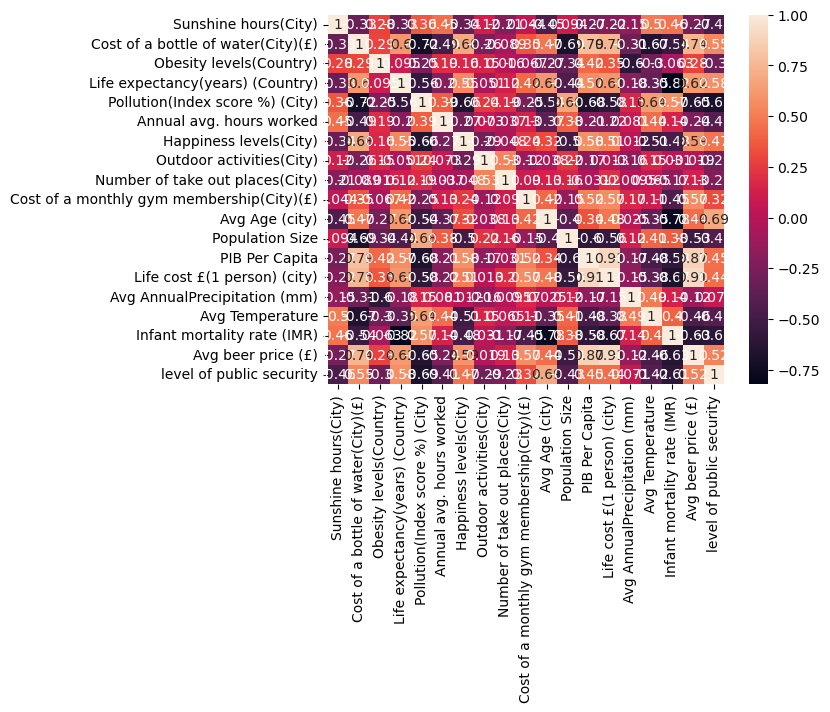

<Figure size 20000x20000 with 0 Axes>

In [40]:
sns.heatmap(data.corr(),annot=True) 
plt.figure(figsize=(200,200))
plt.show()

In [41]:
matriz_correlacao = data.corr()
matriz_correlacao

,Sunshine hours(City),Cost of a bottle of water(City)(£),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score %) (City),Annual avg. hours worked,Happiness levels(City),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)(£),Avg Age (city),Population Size,PIB Per Capita,Life cost £(1 person) (city),Avg AnnualPrecipitation (mm),Avg Temperature,Infant mortality rate (IMR),Avg beer price (£),level of public security
Sunshine hours(City),1.000000,-0.331979,0.283321,-0.327166,0.360693,0.451769,-0.337448,0.116552,-0.212283,0.043625,-0.450883,0.094115,-0.271592,-0.215502,-0.151508,0.501528,0.459727,-0.273968,-0.460896
Cost of a bottle of water(City)(£),-0.331979,1.000000,0.291155,0.602022,-0.723917,-0.485392,0.682943,-0.257688,-0.088890,0.351095,0.474914,-0.690842,0.791634,0.748161,-0.313330,-0.665899,-0.539968,0.740772,0.550419
Obesity levels(Country),0.283321,0.291155,1.000000,0.095117,-0.248783,0.192757,0.160189,0.147823,0.015848,-0.067018,-0.269122,-0.344528,0.423959,0.354856,-0.597457,-0.301177,-0.063275,0.283145,-0.303655
Life expectancy(years) (Country),-0.327166,0.602022,0.095117,1.000000,-0.558853,-0.204247,0.545530,-0.051228,0.123832,0.424616,0.615100,-0.444699,0.571403,0.613135,-0.179768,-0.345862,-0.822608,0.616941,0.578035
Pollution(Index score %) (City),0.360693,-0.723917,-0.248783,-0.558853,1.000000,0.386896,-0.656259,0.241276,0.188092,-0.249446,-0.538315,0.676539,-0.677024,-0.581292,0.153347,0.636157,0.574811,-0.649004,-0.693770
Annual avg. hours worked,0.451769,-0.485392,0.192757,-0.204247,0.386896,1.000000,-0.267317,0.073396,-0.036906,0.128142,-0.370845,0.384617,-0.209091,-0.217916,0.080758,0.444337,0.140373,-0.239146,-0.410900
Happiness levels(City),-0.337448,0.682943,0.160189,0.545530,-0.656259,-0.267317,1.000000,-0.294232,-0.047592,0.239847,0.315467,-0.502646,0.575001,0.506807,0.011805,-0.505847,-0.481077,0.588121,0.466327
Outdoor activities(City),0.116552,-0.257688,0.147823,-0.051228,0.241276,0.073396,-0.294232,1.000000,0.528633,-0.119679,-0.038192,0.221348,-0.166159,0.013394,-0.156503,0.153741,0.031263,-0.019012,-0.287071
Number of take out places(City),-0.212283,-0.088890,0.015848,0.123832,0.188092,-0.036906,-0.047592,0.528633,1.000000,0.089824,0.132940,0.156045,-0.031096,0.196238,-0.009484,0.065106,-0.167151,0.125913,-0.225572
Cost of a monthly gym membership(City)(£),0.043625,0.351095,-0.067018,0.424616,-0.249446,0.128142,0.239847,-0.119679,0.089824,1.000000,0.416755,-0.146082,0.518323,0.567457,0.169421,0.114891,-0.449234,0.568176,0.320610


In [42]:
y = data['Happiness levels(City)']
data.drop(['Happiness levels(City)'],axis=1,inplace=True)
#data.drop(['Avg Temperature'],axis=1,inplace=True)
data.drop(['City'],axis=1,inplace=True)
#data.drop(['Number of take out places(City)'],axis=1,inplace=True)
#data.drop(['level of public security'],axis=1,inplace=True)
#data.drop(['Infant mortality rate (IMR)'],axis=1,inplace=True)

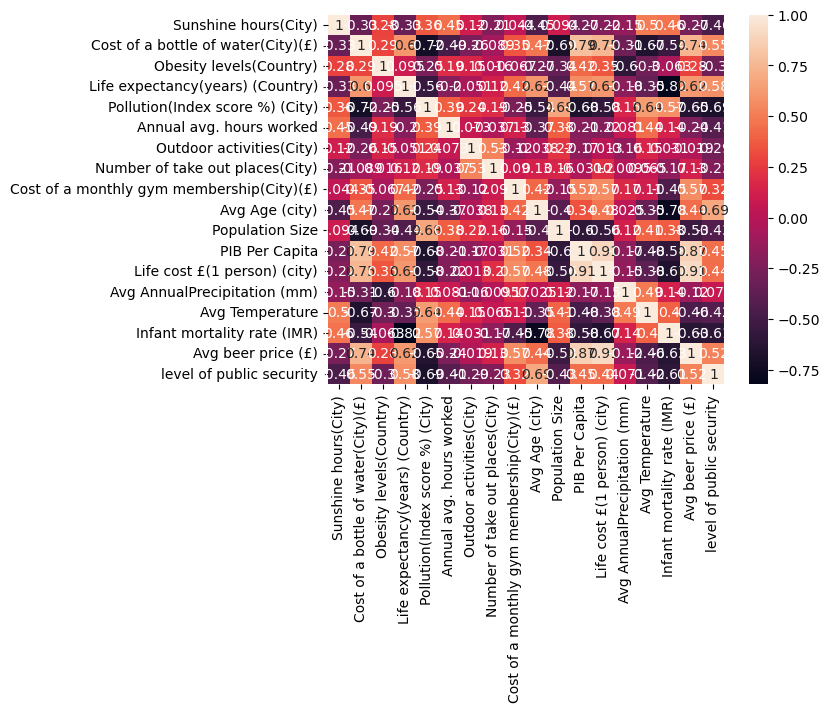

In [43]:
sns.heatmap(data.corr(),annot=True) 
plt.show()

In [44]:
data.head()

,Rank,Sunshine hours(City),Cost of a bottle of water(City)(£),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score %) (City),Annual avg. hours worked,Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)(£),Avg Age (city),Population Size,PIB Per Capita,Life cost £(1 person) (city),Avg AnnualPrecipitation (mm),Avg Temperature,Infant mortality rate (IMR),Avg beer price (£),level of public security
0,1,1858.0,1.92,20.4,81.2,30.93,1434.0,422,1048,34.90,43.7,87300,38370,2900,838,10.4,3.4,4.5,75.8
1,2,2636.0,1.48,29.0,82.1,26.86,1712.0,406,1103,41.66,38.7,5367206,39890,3000,1218,17.3,2.8,6.0,57.3
2,3,1884.0,1.94,20.1,81.0,17.33,1501.0,132,1008,25.74,43.9,1931593,33890,2500,594,10.6,2.9,3.5,80.8
3,4,1821.0,1.72,20.6,81.8,19.63,1452.0,129,598,37.31,40.7,975000,42940,2800,539,6.8,2.6,6.5,84.7
4,5,1630.0,2.19,19.7,79.8,21.24,1380.0,154,523,32.53,39.5,794128,42350,2800,611,12.5,3.6,5.5,84.1


In [45]:
data.isna().sum()

Rank                                         0
Sunshine hours(City)                         0
Cost of a bottle of water(City)(£)           0
Obesity levels(Country)                      0
Life expectancy(years) (Country)             0
Pollution(Index score %) (City)              0
Annual avg. hours worked                     0
Outdoor activities(City)                     0
Number of take out places(City)              0
Cost of a monthly gym membership(City)(£)    0
Avg Age (city)                               0
Population Size                              0
PIB Per Capita                               0
Life cost £(1 person) (city)                 0
Avg AnnualPrecipitation (mm)                 0
Avg Temperature                              0
Infant mortality rate (IMR)                  0
Avg beer price (£)                           0
level of public security                     0
dtype: int64

In [46]:
numerical = data.select_dtypes(include = np.number) 


In [47]:
scaler = StandardScaler()
numerical_transformed = pd.DataFrame(scaler.fit_transform(numerical), columns=numerical.columns)

In [48]:
#numerical_transformed = numerical.apply(lambda x: boxcox(x)[0])

In [49]:
numerical_transformed.head()

,Sunshine hours(City),Cost of a bottle of water(City)(£),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score %) (City),Annual avg. hours worked,Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)(£),Avg Age (city),Population Size,PIB Per Capita,Life cost £(1 person) (city),Avg AnnualPrecipitation (mm),Avg Temperature,Infant mortality rate (IMR),Avg beer price (£),level of public security
0,-0.722639,1.067788,-0.158639,0.559394,-0.935004,-1.588946,1.678781,-0.287116,-0.388659,1.048907,-0.877533,0.492188,0.670165,-0.264033,-1.354826,-0.410901,0.313361,0.745788
1,0.680821,0.441909,0.703625,0.731548,-1.126707,0.238593,1.550275,-0.246616,0.070184,0.094970,-0.060282,0.576627,0.777106,0.448444,-0.162779,-0.518928,1.213441,-0.458379
2,-0.675737,1.096238,-0.188718,0.521137,-1.575582,-1.148496,-0.650380,-0.316570,-1.010406,1.087064,-0.592064,0.243317,0.242400,-0.721519,-1.320274,-0.500923,-0.286692,1.071238
3,-0.789385,0.783298,-0.138586,0.674163,-1.467249,-1.470616,-0.674475,-0.618478,-0.225078,0.476544,-0.740130,0.746060,0.563223,-0.824641,-1.976764,-0.554936,1.513468,1.325089
4,-1.133936,1.451851,-0.228823,0.291599,-1.391416,-1.943935,-0.473685,-0.673705,-0.549526,0.247600,-0.768126,0.713284,0.563223,-0.689645,-0.992029,-0.374892,0.913415,1.286035


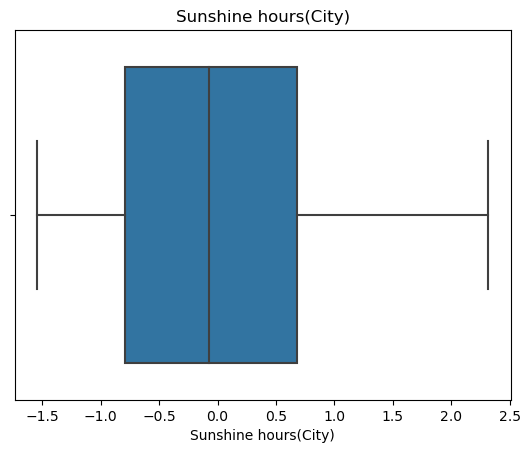

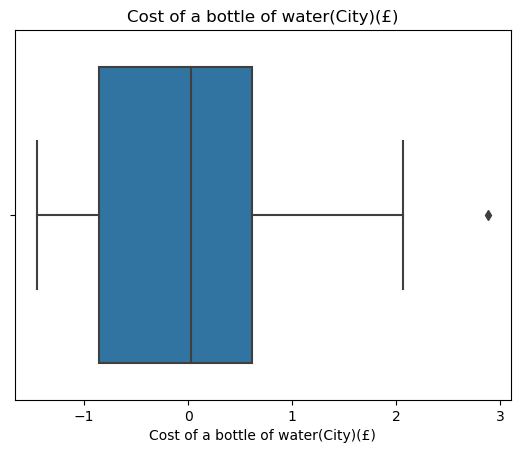

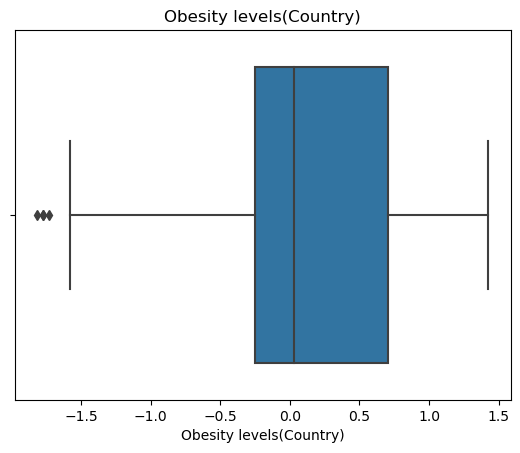

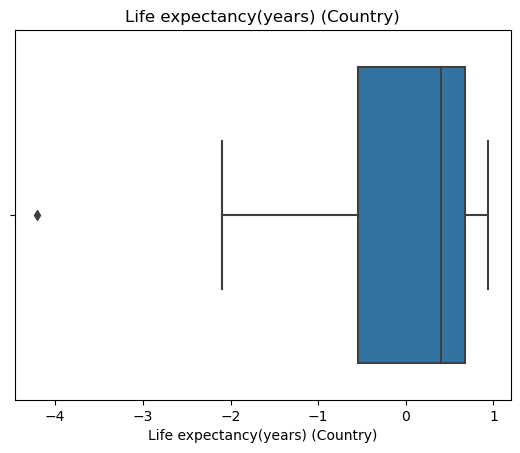

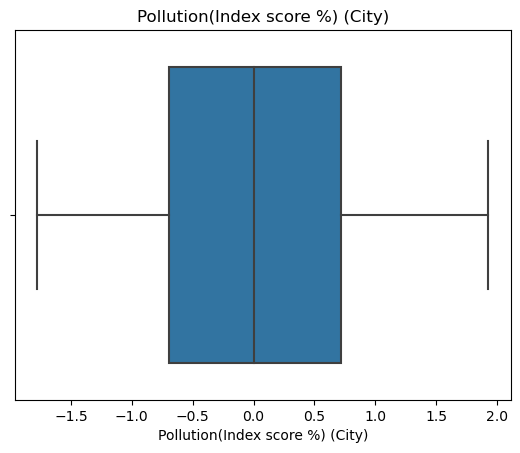

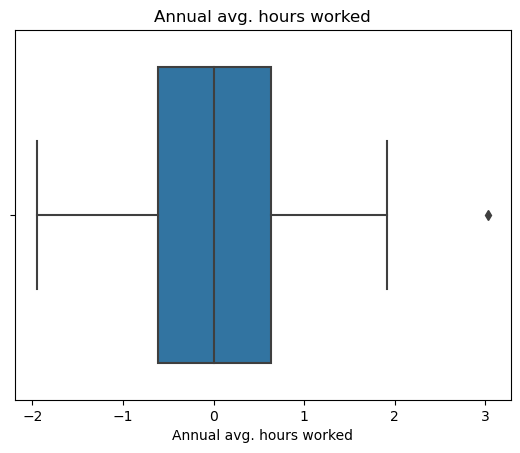

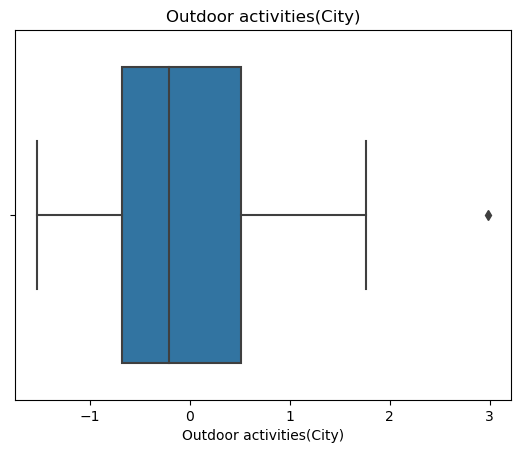

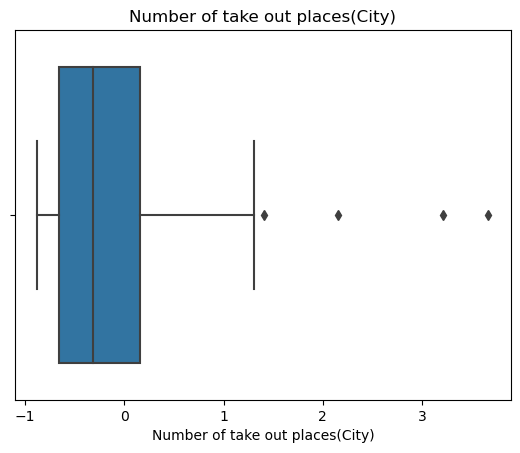

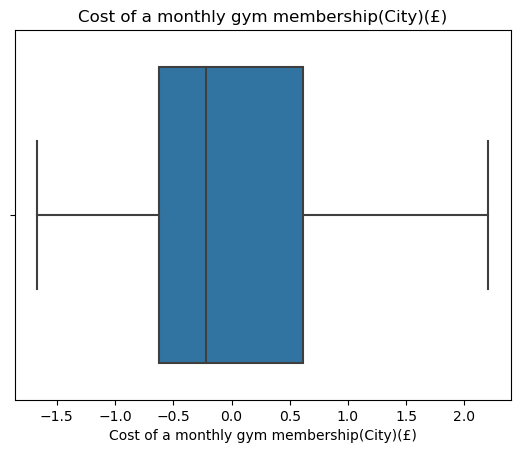

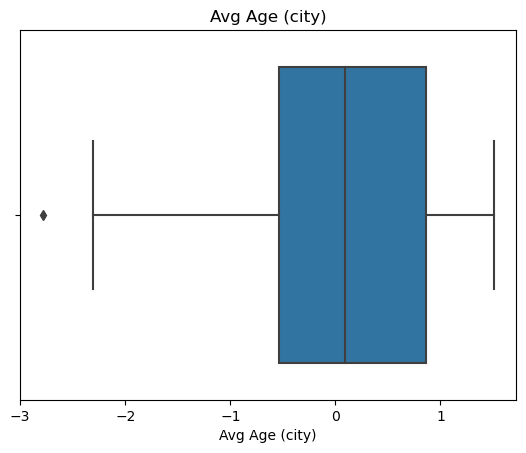

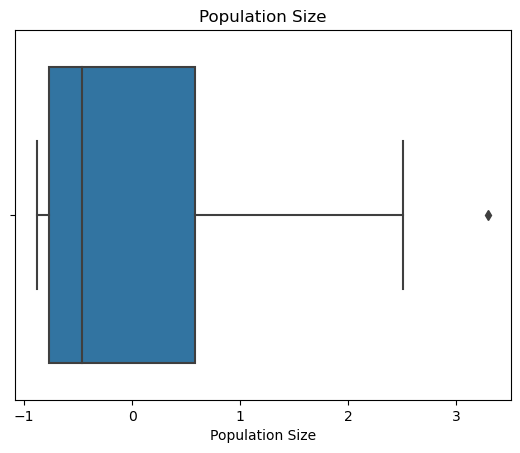

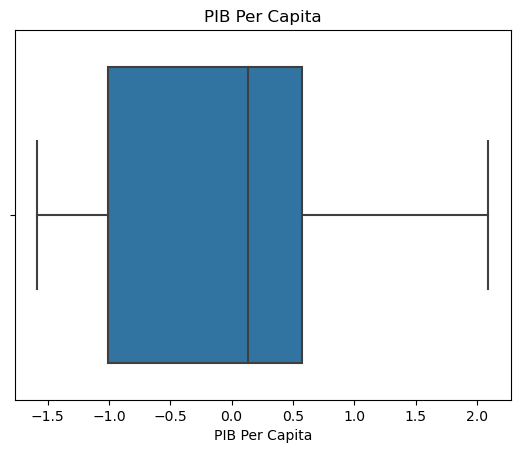

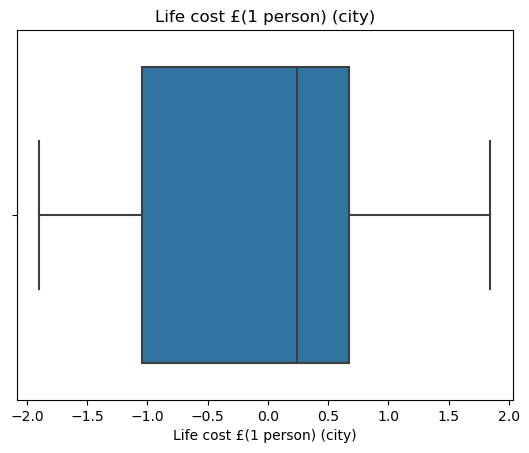

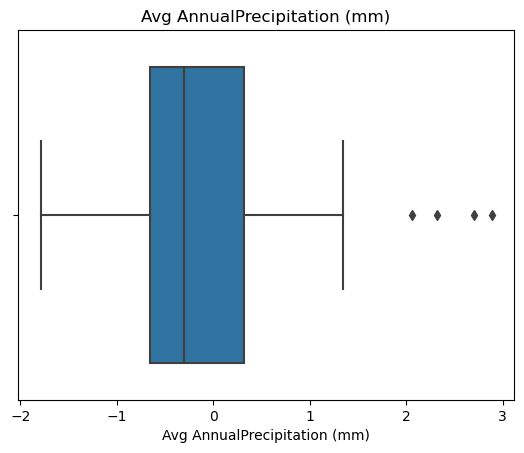

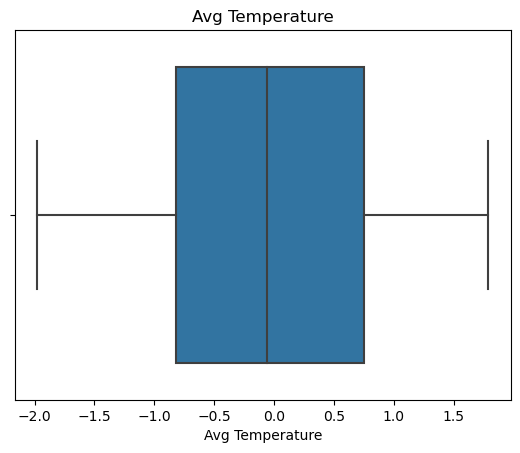

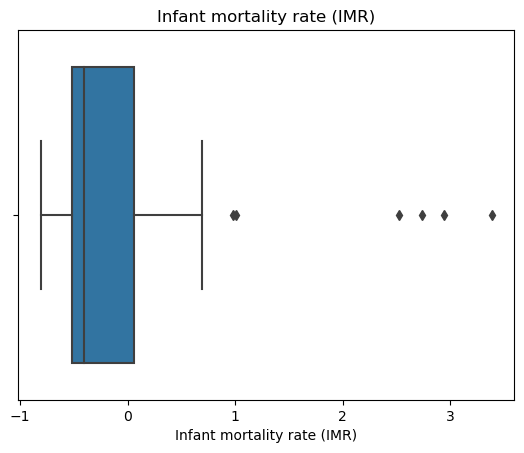

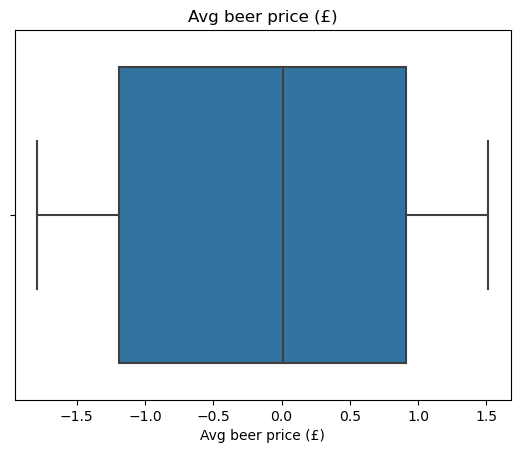

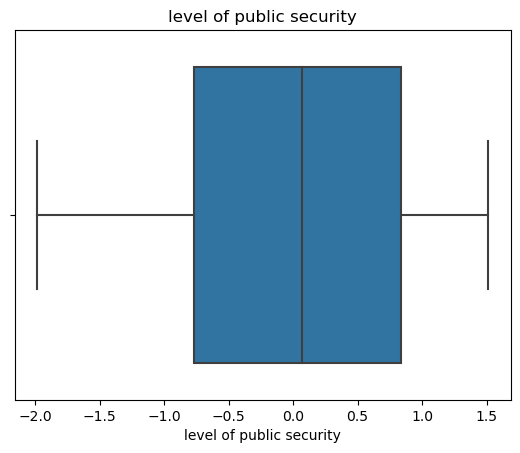

In [50]:
def plot_outliers(df):
    for col in df.columns:
        plt.figure()
        sns.boxplot(x=df[col])
        plt.title(col)
        plt.show()
plot_outliers(numerical_transformed)

In [51]:
numerical_transformed.head()

,Sunshine hours(City),Cost of a bottle of water(City)(£),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score %) (City),Annual avg. hours worked,Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)(£),Avg Age (city),Population Size,PIB Per Capita,Life cost £(1 person) (city),Avg AnnualPrecipitation (mm),Avg Temperature,Infant mortality rate (IMR),Avg beer price (£),level of public security
0,-0.722639,1.067788,-0.158639,0.559394,-0.935004,-1.588946,1.678781,-0.287116,-0.388659,1.048907,-0.877533,0.492188,0.670165,-0.264033,-1.354826,-0.410901,0.313361,0.745788
1,0.680821,0.441909,0.703625,0.731548,-1.126707,0.238593,1.550275,-0.246616,0.070184,0.094970,-0.060282,0.576627,0.777106,0.448444,-0.162779,-0.518928,1.213441,-0.458379
2,-0.675737,1.096238,-0.188718,0.521137,-1.575582,-1.148496,-0.650380,-0.316570,-1.010406,1.087064,-0.592064,0.243317,0.242400,-0.721519,-1.320274,-0.500923,-0.286692,1.071238
3,-0.789385,0.783298,-0.138586,0.674163,-1.467249,-1.470616,-0.674475,-0.618478,-0.225078,0.476544,-0.740130,0.746060,0.563223,-0.824641,-1.976764,-0.554936,1.513468,1.325089
4,-1.133936,1.451851,-0.228823,0.291599,-1.391416,-1.943935,-0.473685,-0.673705,-0.549526,0.247600,-0.768126,0.713284,0.563223,-0.689645,-0.992029,-0.374892,0.913415,1.286035


In [52]:
numerical_transformed.isna().sum()

Sunshine hours(City)                         0
Cost of a bottle of water(City)(£)           0
Obesity levels(Country)                      0
Life expectancy(years) (Country)             0
Pollution(Index score %) (City)              0
Annual avg. hours worked                     0
Outdoor activities(City)                     0
Number of take out places(City)              0
Cost of a monthly gym membership(City)(£)    0
Avg Age (city)                               0
Population Size                              0
PIB Per Capita                               0
Life cost £(1 person) (city)                 0
Avg AnnualPrecipitation (mm)                 0
Avg Temperature                              0
Infant mortality rate (IMR)                  0
Avg beer price (£)                           0
level of public security                     0
dtype: int64

In [53]:
categorical = data.select_dtypes(object)

In [54]:
categorical.head()

,Rank
0,1
1,2
2,3
3,4
4,5


In [55]:
categorical.nunique()

Rank    45
dtype: int64

In [56]:
categorical.drop(['Rank'],axis=1,inplace=True)

In [57]:
categorical.dtypes

Series([], dtype: object)

In [58]:
# Encode the Categorical

In [59]:
categorical_encode = pd.DataFrame(OneHotEncoder().fit(pd.DataFrame(categorical)).transform(pd.DataFrame(categorical)).toarray())

In [60]:
categorical_encode.head()

""
0
1
2
3
4


In [61]:
#data["City"].tolist()

In [62]:
categorical_encode.head()

""
0
1
2
3
4


In [63]:
# train test split

In [64]:
y.dtypes

dtype('float64')

In [65]:
y.head()

0    7.41
1    7.13
2    6.99
3    7.37
4    7.53
Name: Happiness levels(City), dtype: float64

In [66]:
X = pd.DataFrame(np.concatenate((numerical_transformed, categorical_encode), axis=1))

In [67]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.722639,1.067788,-0.158639,0.559394,-0.935004,-1.588946,1.678781,-0.287116,-0.388659,1.048907,-0.877533,0.492188,0.670165,-0.264033,-1.354826,-0.410901,0.313361,0.745788
1,0.680821,0.441909,0.703625,0.731548,-1.126707,0.238593,1.550275,-0.246616,0.070184,0.094970,-0.060282,0.576627,0.777106,0.448444,-0.162779,-0.518928,1.213441,-0.458379
2,-0.675737,1.096238,-0.188718,0.521137,-1.575582,-1.148496,-0.650380,-0.316570,-1.010406,1.087064,-0.592064,0.243317,0.242400,-0.721519,-1.320274,-0.500923,-0.286692,1.071238
3,-0.789385,0.783298,-0.138586,0.674163,-1.467249,-1.470616,-0.674475,-0.618478,-0.225078,0.476544,-0.740130,0.746060,0.563223,-0.824641,-1.976764,-0.554936,1.513468,1.325089
4,-1.133936,1.451851,-0.228823,0.291599,-1.391416,-1.943935,-0.473685,-0.673705,-0.549526,0.247600,-0.768126,0.713284,0.563223,-0.689645,-0.992029,-0.374892,0.913415,1.286035


In [68]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.722639,1.067788,-0.158639,0.559394,-0.935004,-1.588946,1.678781,-0.287116,-0.388659,1.048907,-0.877533,0.492188,0.670165,-0.264033,-1.354826,-0.410901,0.313361,0.745788
1,0.680821,0.441909,0.703625,0.731548,-1.126707,0.238593,1.550275,-0.246616,0.070184,0.094970,-0.060282,0.576627,0.777106,0.448444,-0.162779,-0.518928,1.213441,-0.458379
2,-0.675737,1.096238,-0.188718,0.521137,-1.575582,-1.148496,-0.650380,-0.316570,-1.010406,1.087064,-0.592064,0.243317,0.242400,-0.721519,-1.320274,-0.500923,-0.286692,1.071238
3,-0.789385,0.783298,-0.138586,0.674163,-1.467249,-1.470616,-0.674475,-0.618478,-0.225078,0.476544,-0.740130,0.746060,0.563223,-0.824641,-1.976764,-0.554936,1.513468,1.325089
4,-1.133936,1.451851,-0.228823,0.291599,-1.391416,-1.943935,-0.473685,-0.673705,-0.549526,0.247600,-0.768126,0.713284,0.563223,-0.689645,-0.992029,-0.374892,0.913415,1.286035


In [69]:
y.head()

0    7.41
1    7.13
2    6.99
3    7.37
4    7.53
Name: Happiness levels(City), dtype: float64

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=100) 

In [71]:
from sklearn import linear_model

In [72]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
r2_score(y_test, predictions)

-0.6605152885253569

In [73]:
predictions

array([7.31215065, 5.05440991, 8.60496321, 6.10317995, 5.52074702,
       6.37608488, 7.35784795, 4.50060191, 5.69537985, 6.7519503 ,
       6.49668475, 7.08273923, 6.71267039, 6.78347281, 6.64098651,
       6.970419  , 7.02217312, 7.57579646])

In [74]:
y_test

6     7.39
17    5.94
19    7.56
29    7.03
38    5.36
44    5.66
5     7.82
25    6.84
27    7.10
40    7.18
0     7.41
32    6.67
31    5.93
33    5.85
20    7.46
7     6.58
42    6.02
18    7.07
Name: Happiness levels(City), dtype: float64

In [75]:
from sklearn.metrics import mean_squared_error

In [76]:
mse = mean_squared_error(y_test, predictions )
mse

0.8719042902073878

In [77]:
import math
rmse = math.sqrt(mse)
rmse

0.9337581540245782

In [78]:
from sklearn.neighbors import KNeighborsRegressor

In [79]:
kmodel = KNeighborsRegressor(n_neighbors=9)  
kmodel.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=9)

In [80]:
predictions = kmodel.predict(X_test)
kmodel.score(X_test,y_test)

0.35403588540761477

Feature: Sunshine hours(City), Score: 49.47500
Feature: Cost of a bottle of water(City)(£), Score: 84.69564
Feature: Obesity levels(Country), Score: -0.00000
Feature: Life expectancy(years) (Country), Score: 0.00000
Feature: Pollution(Index score %) (City), Score: -0.00000
Feature: Annual avg. hours worked, Score: 0.00000
Feature: Outdoor activities(City), Score: 0.00000
Feature: Number of take out places(City), Score: 0.00000
Feature: Cost of a monthly gym membership(City)(£), Score: 38.72211
Feature: Avg Age (city), Score: 46.40216
Feature: Population Size, Score: 79.33023
Feature: PIB Per Capita, Score: 97.14084
Feature: Life cost £(1 person) (city), Score: -0.00000
Feature: Avg AnnualPrecipitation (mm), Score: 81.90808
Feature: Avg Temperature, Score: 24.12260
Feature: Infant mortality rate (IMR), Score: 2.54289
Feature: Avg beer price (£), Score: 88.70904
Feature: level of public security, Score: -0.00000


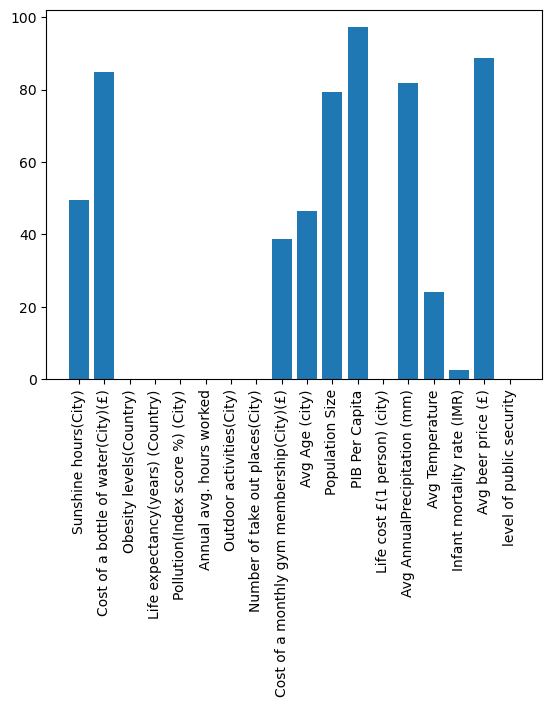

In [81]:
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Define os nomes das colunas
cols = ['Sunshine hours(City)', 'Cost of a bottle of water(City)(£)',
       'Obesity levels(Country)', 'Life expectancy(years) (Country)',
       'Pollution(Index score %) (City)', 'Annual avg. hours worked',
       'Outdoor activities(City)', 'Number of take out places(City)',
       'Cost of a monthly gym membership(City)(£)', 'Avg Age (city)',
       'Population Size', 'PIB Per Capita', 'Life cost £(1 person) (city)',
       'Avg AnnualPrecipitation (mm)', 'Avg Temperature',
       'Infant mortality rate (IMR)', 'Avg beer price (£)',
       'level of public security']

# Cria um DataFrame com as colunas nomeadas
X, y = make_regression(n_samples=1000, n_features=18, n_informative=10, random_state=1)
df = pd.DataFrame(X, columns=cols)

# Define o modelo de regressão
model = LinearRegression()

# Faz o ajuste do modelo aos dados
model.fit(df.to_numpy(), y)

# Obtém a importância das features
importance = model.coef_

# Sumariza a importância das features
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (cols[i], v))

# Plota a importância das features
plt.bar(cols, importance)
plt.xticks(rotation=90)
plt.show()


In [82]:
predict_model = kmodel.fit(X_train,y_train)

In [83]:
# exporte to csv. and put the name of each column per feature

In [84]:
cities_pred = pd.read_csv('cities_to_predict.csv',index_col=0)

In [85]:
cities_pred

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City)(£),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score %) (City),Annual avg. hours worked,Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)(£),Avg Age (city),Population Size,PIB Per Capita,Life cost £(1 person) (city),Avg AnnualPrecipitation (mm),Avg Temperature,Infant mortality rate (IMR),Avg beer price (£)
0,Porto,1,2524,0.99,24.5,82.7,22.1,1768,101.0,586,49.69,42.7,214000,24500,1255,1260,15.5,2.9,2.0
1,Bragança,2,2354,0.60,24.5,82.7,9.3,1768,101.0,45,28.50,44.0,34000,18490,732,1218,13.3,2.9,1.0


In [86]:
cities_pred['level of public security'] = [66.0, 71.0 ]

In [87]:
cities_pred.drop(['City'],axis=1,inplace=True)
cities_pred.drop(['Rank'],axis=1,inplace=True)

In [88]:
cities_pred_Cat = cities_pred.select_dtypes(object)

In [89]:
cities_num = cities_pred.select_dtypes(include = np.number) 

In [90]:
categorical_encode_cities = pd.DataFrame(OneHotEncoder().fit(pd.DataFrame(cities_pred_Cat)).transform(pd.DataFrame(cities_pred_Cat)).toarray())

In [91]:
scaler = StandardScaler()
cities_num_transformed = pd.DataFrame(scaler.fit_transform(cities_num), columns=cities_num.columns)

In [92]:
cities_pred.dtypes

Sunshine hours(City)                           int64
Cost of a bottle of water(City)(£)           float64
Obesity levels(Country)                      float64
Life expectancy(years) (Country)             float64
Pollution(Index score %) (City)              float64
Annual avg. hours worked                       int64
Outdoor activities(City)                     float64
Number of take out places(City)                int64
Cost of a monthly gym membership(City)(£)    float64
Avg Age (city)                               float64
Population Size                                int64
PIB Per Capita                                 int64
Life cost £(1 person) (city)                   int64
Avg AnnualPrecipitation (mm)                   int64
Avg Temperature                              float64
Infant mortality rate (IMR)                  float64
Avg beer price (£)                           float64
level of public security                     float64
dtype: object

In [93]:
cities_predic = pd.DataFrame(np.concatenate((cities_num_transformed, categorical_encode_cities), axis=1))

In [94]:
happy_predictions = kmodel.predict(cities_predic)

In [95]:
happy_predictions

array([6.71777778, 6.85777778])

In [96]:
cities_pred['Happiness levels(City)'] = happy_predictions

In [97]:
cities_pred

,Sunshine hours(City),Cost of a bottle of water(City)(£),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score %) (City),Annual avg. hours worked,Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)(£),Avg Age (city),Population Size,PIB Per Capita,Life cost £(1 person) (city),Avg AnnualPrecipitation (mm),Avg Temperature,Infant mortality rate (IMR),Avg beer price (£),level of public security,Happiness levels(City)
0,2524,0.99,24.5,82.7,22.1,1768,101.0,586,49.69,42.7,214000,24500,1255,1260,15.5,2.9,2.0,66.0,6.717778
1,2354,0.60,24.5,82.7,9.3,1768,101.0,45,28.50,44.0,34000,18490,732,1218,13.3,2.9,1.0,71.0,6.857778


In [98]:
cities_pred['City'] = ['Porto', 'Bragança']

In [99]:
cities_pred

,Sunshine hours(City),Cost of a bottle of water(City)(£),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score %) (City),Annual avg. hours worked,Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)(£),Avg Age (city),Population Size,PIB Per Capita,Life cost £(1 person) (city),Avg AnnualPrecipitation (mm),Avg Temperature,Infant mortality rate (IMR),Avg beer price (£),level of public security,Happiness levels(City),City
0,2524,0.99,24.5,82.7,22.1,1768,101.0,586,49.69,42.7,214000,24500,1255,1260,15.5,2.9,2.0,66.0,6.717778,Porto
1,2354,0.60,24.5,82.7,9.3,1768,101.0,45,28.50,44.0,34000,18490,732,1218,13.3,2.9,1.0,71.0,6.857778,Bragança


In [100]:
cities_pred.columns

Index(['Sunshine hours(City)', 'Cost of a bottle of water(City)(£)',
       'Obesity levels(Country)', 'Life expectancy(years) (Country)',
       'Pollution(Index score %) (City)', 'Annual avg. hours worked',
       'Outdoor activities(City)', 'Number of take out places(City)',
       'Cost of a monthly gym membership(City)(£)', 'Avg Age (city)',
       'Population Size', 'PIB Per Capita', 'Life cost £(1 person) (city)',
       'Avg AnnualPrecipitation (mm)', 'Avg Temperature',
       'Infant mortality rate (IMR)', 'Avg beer price (£)',
       'level of public security', 'Happiness levels(City)', 'City'],
      dtype='object')

In [101]:
lisbon_row = {'Sunshine hours(City)': 2806, 'Cost of a bottle of water(City)(£)': 0.99,
       'Obesity levels(Country)': 24.5, 'Life expectancy(years) (Country)': 82.7,
       'Pollution(Index score %) (City)': 36.1, 'Annual avg. hours worked': 1768,
       'Outdoor activities(City)': 169,
       'Number of take out places(City)': 1209,
       'Cost of a monthly gym membership(City)(£)': 49.69, 'Avg Age (city)': 45.0,
       'Population Size': 547733 , 'PIB Per Capita': 26100, 'Life cost £(1 person) (city)': 1800,
       'Avg AnnualPrecipitation (mm)': 711, 'Avg Temperature': 22.3,
       'Infant mortality rate (IMR)': 2.9, 'Avg beer price (£)': 2.00, 'level of public security':65.3, 
       'Happiness levels(City)': 5.66, 'City': 'Lisbon'}

In [102]:
cities_pred = cities_pred.append(lisbon_row, ignore_index=True)

/var/folders/13/xty849950wj5f71_v7v6vysc0000gn/T/ipykernel_98917/1828742989.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cities_pred = cities_pred.append(lisbon_row, ignore_index=True)


In [103]:
cities_pred

,Sunshine hours(City),Cost of a bottle of water(City)(£),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score %) (City),Annual avg. hours worked,Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)(£),Avg Age (city),Population Size,PIB Per Capita,Life cost £(1 person) (city),Avg AnnualPrecipitation (mm),Avg Temperature,Infant mortality rate (IMR),Avg beer price (£),level of public security,Happiness levels(City),City
0,2524,0.99,24.5,82.7,22.1,1768,101.0,586,49.69,42.7,214000,24500,1255,1260,15.5,2.9,2.0,66.0,6.717778,Porto
1,2354,0.60,24.5,82.7,9.3,1768,101.0,45,28.50,44.0,34000,18490,732,1218,13.3,2.9,1.0,71.0,6.857778,Bragança
2,2806,0.99,24.5,82.7,36.1,1768,169.0,1209,49.69,45.0,547733,26100,1800,711,22.3,2.9,2.0,65.3,5.660000,Lisbon


In [104]:
cities_pred.to_csv('Cities_pred.csv')